##  Prediction of store sales
Prediction of sales is the central task in this challenge. you want to predict daily sales in various stores up to 6 weeks ahead of time. This will help the company plan ahead of time. 

## Import the libraries and the dataset

In [18]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

#Adding scripts path
import sys, os
sys.path.insert(0,'../scripts/')

# #from data_Preprocess import CleanDataFrame
# from data_info import DataInfo 
# from VisualisationPlots import VisualiseDf



In [48]:
import scripts.util as helper

ModuleNotFoundError: No module named 'scripts.util'

In [47]:
import warnings
warnings.filterwarnings('ignore')
import dvc.api

## Exploring the dataset that we have

In [15]:
# importing dataset
df = pd.read_csv("../data/train.csv")
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,1,4,5020.0,546.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.194139
2,1,3,4782.0,523.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.143403
3,1,2,5011.0,560.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,8.948214
4,1,1,6102.0,612.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.970588


In [17]:
df.isnull().any().sum()

0

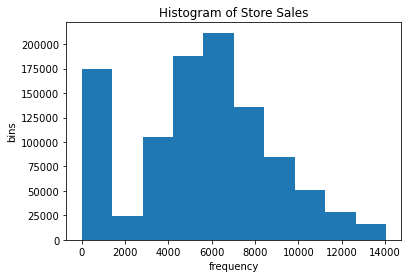

In [19]:
plt.hist(df['Sales'])
plt.title('Histogram of Store Sales')
plt.ylabel('bins')
plt.xlabel('frequency')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  float64
 3   Customers                  1017209 non-null  float64
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Day                        1017209 non-null  int64  
 11  WeekOfYear                 1017209 non-null  int64  
 12  Dates                      1017209 non-null  object 
 13  StoreType   

In [22]:
columns = ['Sales','Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

feature_columns = ['Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'WeekOfYear','Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

sample_size = 1000
sampled_df = df[columns].sample(sample_size)


## Separet Test and train files
train_x = sampled_df[feature_columns]
train_y = sampled_df[['Sales']]
train_x.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,WeekOfYear,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
173088,192,4,1,1,0,20,8,2,2014,d,c,2770.0,1
364534,400,3,1,1,0,5,45,11,2014,a,a,70.0,1
858713,943,6,1,0,0,6,49,12,2014,d,c,18020.0,0
788779,866,3,1,1,0,12,46,11,2014,d,a,9680.0,1
739720,812,7,0,0,0,9,23,6,2013,d,a,2590.0,0


In [23]:
### Label encoding
lb = LabelEncoder()
train_x['StoreType'] = lb.fit_transform(train_x['StoreType'])
train_x['Assortment'] = lb.fit_transform(train_x['Assortment'])

train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 173088 to 645111
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1000 non-null   int64  
 1   DayOfWeek            1000 non-null   int64  
 2   Open                 1000 non-null   int64  
 3   Promo                1000 non-null   int64  
 4   SchoolHoliday        1000 non-null   int64  
 5   Day                  1000 non-null   int64  
 6   WeekOfYear           1000 non-null   int64  
 7   Month                1000 non-null   int64  
 8   Year                 1000 non-null   int64  
 9   StoreType            1000 non-null   int32  
 10  Assortment           1000 non-null   int32  
 11  CompetitionDistance  1000 non-null   float64
 12  Promo2               1000 non-null   int64  
dtypes: float64(1), int32(2), int64(10)
memory usage: 101.6 KB


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
# scaling 
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# X = x_scaler.fit_transform(train_x)
X = train_x
Y = y_scaler.fit_transform(train_y)

In [27]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  

In [30]:
rf_reg = RandomForestRegressor(n_estimators = 100, max_depth=25, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, random_state=0)

In [31]:
# score of the model
score = rf_reg.score(X_test, y_test)
print(f"Prediction Score of the Model is {round(score * 100, 2)}%")

Prediction Score of the Model is 64.24%


In [ ]:
# train model
def train_model(X, Y, model_type='LinearRegression'):
    model = LinearRegression()
    
    if(model_type == 'RandomForest'):
        model = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0)
    
        
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):
        with mlflow.start_run(run_name=model_type, nested = True):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            print(f"Prediction Score of the {model_type} is {round(score * 100, 2)}%")
            
            if(model_type == 'LinearRegression'):
                mlflow.log_param('LR-Score', score)
                
            if(model_type == 'RandomForest'):
                mlflow.log_param('RF-Score', score)
                
            mlflow.sklearn.log_model(model, model_type +' Model')
            mlflow.end_run()
            
    print()

## Building models with sklearn pipelines


In [32]:
## Prepare the training and test features
x = train_x
y = train_y

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [37]:
rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rfr_regretion', RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0))
])

lr = Pipeline(steps=[
    ('scaler2', MinMaxScaler()),
    ('lr_regretion', LinearRegression())
])

dt = Pipeline(steps=[
    ('scaler3', MinMaxScaler()),
    ('dt_regretion', DecisionTreeRegressor(random_state = 0)  )
])

In [38]:
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

Pipeline(steps=[('scaler3', MinMaxScaler()),
                ('dt_regretion', DecisionTreeRegressor(random_state=0))])

In [39]:
# printing score
rfr_score = rfr.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)

print(f"Prediction Score of the RandomForestRegretion is {round(rfr_score * 100, 2)}%")
print(f"Prediction Score of the LinearRegretion is {round(lr_score * 100, 2)}%")
print(f"Prediction Score of the DecisionTree is {round(dt_score * 100, 2)}%")

Prediction Score of the RandomForestRegretion is 64.48%
Prediction Score of the LinearRegretion is 59.3%
Prediction Score of the DecisionTree is 24.72%


## loss function

In [52]:
import util

ModuleNotFoundError: No module named 'scripts.logger_config'

In [40]:
rfr_prediction = rfr.predict(X_test)
lr_prediction = lr.predict(X_test)
dt_prediction = dt.predict(X_test)

rfr_rmse, rft_mae, _ = util.eval_metrics(y_test, rfr_prediction)
lr_rmse, lr_mae, _ = util.eval_metrics(y_test, lr_prediction)
dt_rmse, dt_mae, _ = util.eval_metrics(y_test, dt_prediction)


# print(f"Mean Absolute Loss : {round(mae * 100, 2)}%")
print(f"RandomForest Mean Square Loss : {rfr_rmse}")
print(f"Linear Mean Square Loss : {lr_rmse}")
print(f"DecisionTree Mean Square Loss : {dt_rmse }%")

NameError: name 'util' is not defined

## Post analysis

In [50]:
import plotfunction as plot

Text(0.5, 1.0, 'RandomForestRegretion Feature Importance')

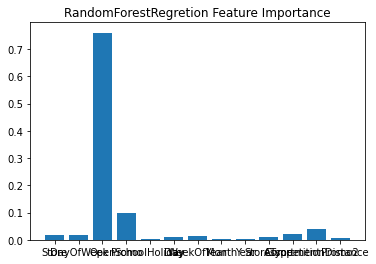

In [58]:
important_features = rfr[1].feature_importances_
#plot.bar(feature_columns, important_features, 'RandomForestRegretion Feature Importance')
plt.bar(feature_columns, important_features)
plt.title('RandomForestRegretion Feature Importance')

Text(0.5, 1.0, 'LinearRegretion Feature Importance')

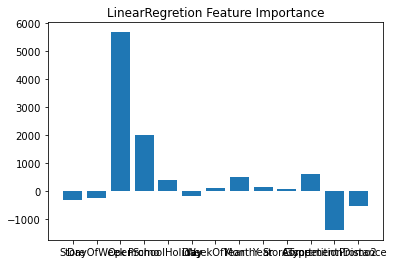

In [60]:
important_features = lr[1].coef_[0]
#from matplotlib import pyplot as plt
#plot.bar(feature_columns, list(important_features), "LinearRegretion Feature Importance")
plt.bar(feature_columns, list(important_features))
plt.title("LinearRegretion Feature Importance")


<BarContainer object of 13 artists>

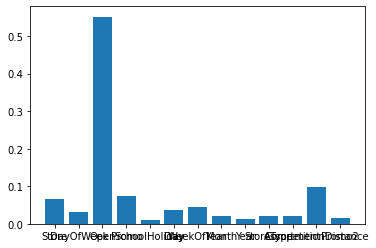

In [61]:
important_features = dt[1].feature_importances_
plt.bar(feature_columns, important_features)

## Serialize models


In [63]:
import pickle 

In [64]:
## use picke to dump mode
## decomment picke to save the model
from time import gmtime, strftime
time = strftime("%Y-%m-%d-%H-%M-%S", gmtime())
reg_model_file_name = f'../models/reg-{time}.pkl'
lr_model_file_name = f'../models/lt-{time}.pkl'
dt_model_file_name = f'../models/dt-{time}.pkl'

files = [reg_model_file_name, lr_model_file_name, dt_model_file_name]
models = [rfr, lr, dt]

print(reg_model_file_name)


for i in range(len(files)):
    pickle.dump(models[i], open(files[i], 'wb'))

../models/reg-2022-09-06-13-04-11.pkl


In [67]:
# adding mlflow
dt_file = '../models/dt-2022-09-06-13-04-11.pkl'
# lr_file = '../models/lt-2022-09-06-13-54-11.pkl'
# rg_file = '../models/reg-2022-09-06-13-04-11.pkl'
dt_model = pickle.load(open(dt_file, 'rb'))
#lr_model = pickle.load(open(lr_file, 'rb'))
#rg_model = pickle.load(open(rg_file, 'rb'))

In [68]:
dt_score = dt_model.score(X_test, y_test)
dt_score


0.24715763112634692

In [72]:
# One hot encoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# 
response_clean['experiment'] = label_encoder.fit_transform(response_clean['experiment'])
response_clean['date'] = label_encoder.fit_transform(response_clean['date'])
response_clean['hour'] = label_encoder.fit_transform(response_clean['hour'])
response_clean['device_make'] = label_encoder.fit_transform(response_clean['device_make'])
response_clean['platform_os'] = label_encoder.fit_transform(response_clean['platform_os'])
response_clean['browser'] = label_encoder.fit_transform(response_clean['browser'])
response_clean['response'] = label_encoder.fit_transform(response_clean['response'])

#### In DVC versioning (the new mergied data)
- is versioned' as 'ver_3 tag


In [12]:
# featching based on version
def get_data(tag, 
            path='data/train.csv', 
            repo ='C:/Users/Ekubay/Documents/Rossmann_Pharmaceutical_sales_Prediction'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [78]:
# retriving based on version
browser_df = get_data('ver_3')
browser_df

,experiment,hour,date,device_make,browser,response
0,1,16,1,13,1,1
1,0,4,5,43,4,1
2,0,15,0,13,1,1
3,1,13,6,65,4,1
4,1,6,2,13,1,1
...,...,...,...,...,...,...
1238,1,17,5,69,4,0
1239,1,18,6,13,1,0
1240,0,7,6,13,1,0
1241,0,16,7,13,1,0


In [67]:
# retriving based on tag 
platfrom_df= get_data('ver1')
platfrom_df

,experiment,hour,date,device_make,platform_os,response
0,1,16,1,13,1,1
1,0,4,5,43,1,1
2,0,15,0,13,1,1
3,1,13,6,65,1,1
4,1,6,2,13,1,1
...,...,...,...,...,...,...
1238,1,17,5,69,1,0
1239,1,18,6,13,1,0
1240,0,7,6,13,1,0
1241,0,16,7,13,1,0


# Splitting the data for training


In [18]:
# For browser df: X1: prediction freatures,y1:target feature
X1 = browser_df.drop('response', axis=1) #prediction feature
y1 = browser_df['response'] #target feature
# 
# For Platform df: X11: prediction freatures,y11:target feature
X11 = platfrom_df.drop('response', axis=1) #prediction features
y11 = platfrom_df['response'] #target feature

In [19]:
# Splitting our dataset into training and testing dataset
#training set 70%, 20% validation, test set 10%

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y11, test_size=0.1, random_state=42)


# 1. Logistic regression

### 1.1 using Browser df

* Cross validation is a statistical method used to estimate the skill of machine learning models. For a k-fold cross validation, there are common tactics that can be used to choose k. In our case k = 5.

In [20]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X1_train, y1_train)
# Then predict results from X_test data
pred_log = log.predict(X1_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y1_test[0:10])

Predicted: [0 0 1 0 0 0 0 0 1 0]
Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


In [21]:
# Applying the 5-fold Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X1_train,y1_train) 
scores=cross_val_score(estimator=regressor,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.54017857 0.52678571 0.57589286 0.53363229 0.52914798]
Mean LogisticRegression score : 0.5411274823830878


In [22]:
# save score
scores1 = pd.DataFrame(scores,columns=['Scores']) 
scores1.head()

,Scores
0,0.540179
1,0.526786
2,0.575893
3,0.533632
4,0.529148


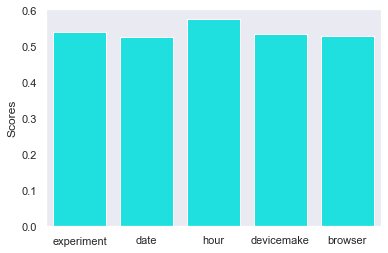

In [23]:
# plotting the accuracy score
sns.set(style="dark", rc={"lines.linewidth": 9})
sns.barplot(x=['experiment','date','hour','devicemake','browser'],y="Scores",data=scores1, color="cyan")
plt.show()
sns.set()

In [24]:
#feature coefficients
regressor.fit(X1 / np.std(X1, 0), y1)
print(regressor.coef_)

[[ 0.05343081 -0.00484439  0.1299312   0.06868544 -0.05886028]]


In [25]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10595
Feature: 1, Score: -0.00185
Feature: 2, Score: 0.02261
Feature: 3, Score: 0.00247
Feature: 4, Score: -0.02966


### *So the most important feature in this model is feature 2 (hour) with a score of 0.02261.

## Analysis of p-value

In [26]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X1_train, y1_train)
list(pvalues)

[0.6321163576102287,
 0.862695922775575,
 0.00038761834136199694,
 0.005793188708905142,
 0.6136439245647207]

### P-value should be less than 0.05
- hour is the most signifcant, 00038761834136199694 which is less than 0.05
- devicemake is the second most, 005793188708905142 significant 
### generally the hour and devicemake are the most contributor to making awareness on the new application

### 1.2 Using platform df

In [17]:
# Applying the 5-fold Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X11_train,y11_train) 
scores=cross_val_score(estimator=regressor,X=X11_train,y=y11_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.54464286 0.54017857 0.57142857 0.52017937 0.53363229]
Mean LogisticRegression score : 0.542012331838565


In [18]:
# saving the output to a pandas dataframe
scores1 = pd.DataFrame(scores,columns=['Scores']) 
scores1.head()

,Scores
0,0.544643
1,0.540179
2,0.571429
3,0.520179
4,0.533632


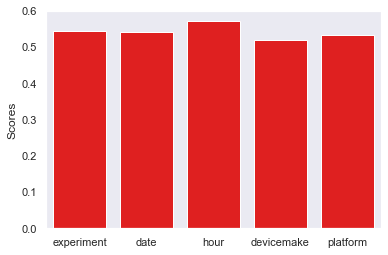

In [19]:
# plotting the accuracy score
sns.set(style="dark", rc={"lines.linewidth": 9})
sns.barplot(x=['experiment','date','hour','devicemake','platform'],y="Scores",data=scores1, color="red")
plt.show()
sns.set()

In [20]:
#feature coefficients
regressor.fit(X11 / np.std(X11, 0), y11)
print(regressor.coef_)

[[ 0.05509583 -0.0055177   0.12475151  0.06072356  0.09600945]]


In [28]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X11, y11)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11122
Feature: 1, Score: -0.00205
Feature: 2, Score: 0.02186
Feature: 3, Score: 0.00193
Feature: 4, Score: 0.63366


* Again, the most important feature in this model is feature 2 (hour) with a score of 0.02186.

In [50]:
#Adding scripts path
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import LogesticRegressionModel
LRModel = LogesticRegressionModel(X1_train, X1_test,  y1_train, y1_test)
clf2, loss_arr_2, acc_arr_2 = LRModel.train(5)
LRModel.write_model('browser_os_Logestic_Reg_model', clf2)

step 0: Validation Accuracy of LogesticRegression is: 0.549
step 0: Validation Loss of LogesticRegression is: 0.671

step 1: Validation Accuracy of LogesticRegression is: 0.513
step 1: Validation Loss of LogesticRegression is: 0.698

step 2: Validation Accuracy of LogesticRegression is: 0.540
step 2: Validation Loss of LogesticRegression is: 0.678

step 3: Validation Accuracy of LogesticRegression is: 0.502
step 3: Validation Loss of LogesticRegression is: 0.706

step 4: Validation Accuracy of LogesticRegression is: 0.543
step 4: Validation Loss of LogesticRegression is: 0.676



### Analysis of the P-value

In [27]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X11_train, y11_train)
list(pvalues)

[0.6321163576102287,
 0.862695922775575,
 0.00038761834136199694,
 0.005793188708905142,
 0.8887605792397241]

### P-value should be less than 0.05
- hour is the most signifcant, 00038761834136199694 which is less than 0.05
- devicemake is the second most, 005793188708905142 significant 
#### generally the hour and devicemake are the most contributor to making awareness on the new application, the platform is the most insignificant  

# 2. XGBOOST

### 2.1 Using Browser Df

In [33]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X1_train, y1_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X1_test, y1_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X1_test)

# See First 10 Predictions and They Actual Values
# print("Predicted:", pred_xgb[0:10])
print("Actual:", y1_test[0:10])

C:\Users\Ekubay\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


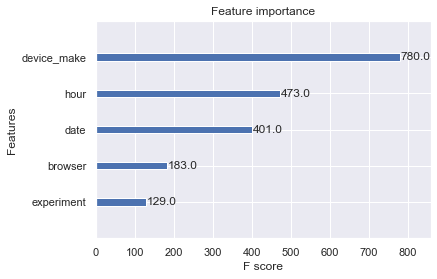

In [34]:
from xgboost import plot_importance
# fit model no training data
model = XGBClassifier()
model.fit(X1, y1)
# plot feature importance
plot_importance(model)
pyplot.show()

* Using this model, device_make is the most important feature in predicting the target variable response.

### 2.2 Using platform DF

In [36]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X11_train, y11_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X11_test, y11_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X11_test)

# See First 10 Predictions and They Actual Values
# print("Predicted:", pred_xgb[0:10])
print("Actual:", y11_test[0:10])

Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


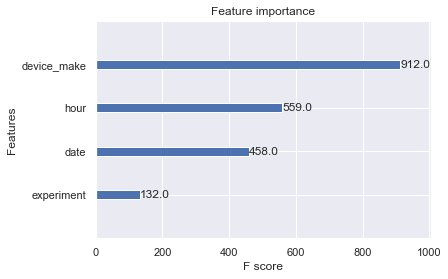

In [37]:
# fit model no training data
model = XGBClassifier()
model.fit(X11, y11)
# plot feature importance
plot_importance(model)
pyplot.show()

* For the same model, but using platform dataframe, again device_make is the most important feature in predicting the target variable response.

In [40]:
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import XGBClassifierModel

xGBClassifierModel = XGBClassifierModel(X1_train, X1_test,  y1_train, y1_test)
clf3, acc_arr, loss_arr = xGBClassifierModel.train(5)
xGBClassifierModel.write_model('browser_os_XGBoost_model', clf3)

## Analysis of the P-value

In [41]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X11_train, y11_train)
list(pvalues)

[0.6321163576102287,
 0.862695922775575,
 0.00038761834136199694,
 0.005793188708905142,
 0.8887605792397241]

### P-value should be less than 0.05
- hour is the most signifcant, 00038761834136199694 which is less than 0.05
- devicemake is the second most, 005793188708905142 significant 
#### generally the hour and devicemake are the most contributor to making awareness on the new application, the platform is the most insignificant  

# 3. Random forest

### 3.1 Using browser df

In [42]:
# Define Random forest Model
rf = RandomForestClassifier()
# We fit our model with our train data
rf.fit(X1_train, y1_train)
# Then predict results from X_test data
pred_rf = rf.predict(X1_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y1_test[0:10])

Predicted: [0 0 1 1 1 1 0 1 0 0]
Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


In [43]:
#Applying k-fold Cross validation on random forest
clf = RandomForestClassifier()
clf.fit(X1_train,y1_train)
clf_scores=cross_val_score(estimator=clf,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
print(clf_scores)
print('Mean clf score :',clf_scores.mean())

[0.58482143 0.54017857 0.52678571 0.5470852  0.52466368]
Mean clf score : 0.5447069186418962


In [44]:
scores2 = pd.DataFrame(clf_scores,columns=['Scores2']) # saving the results into pandas dataframe
scores2.head()

,Scores2
0,0.584821
1,0.540179
2,0.526786
3,0.547085
4,0.524664


In [42]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.04681
Feature: 1, Score: 0.18781
Feature: 2, Score: 0.39676
Feature: 3, Score: 0.28338
Feature: 4, Score: 0.08524


* Random forest algorithm, using browser_dataframe, feature 3 (date) is the most important feature in predicting the target variable response.

### 3.2 Using platform DF

In [45]:
# Define Decision Tree Model
rf = RandomForestClassifier()
# We fit our model with our train data
rf.fit(X11_train, y11_train)
# Then predict results from X_test data
pred_rf = rf.predict(X11_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y11_test[0:10])

Predicted: [0 1 1 1 1 1 0 0 0 0]
Actual: 900     0
1003    0
671     0
620     0
926     0
997     0
745     0
938     0
451     1
439     1
Name: response, dtype: int64


In [33]:
#Applying k-fold Cross validation on Decision tree
clf = RandomForestClassifier()
clf.fit(X11_train,y11_train)
clf_scores=cross_val_score(estimator=clf,X=X11_train,y=y11_train,cv=5,scoring='accuracy')
print(clf_scores)
print('Mean clf score :',clf_scores.mean())

[0.56696429 0.51785714 0.5625     0.56502242 0.5470852 ]
Mean clf score : 0.5518858103779628


In [34]:
scores2 = pd.DataFrame(clf_scores,columns=['Scores2']) # saving the results into pandas dataframe
scores2.head()

,Scores2
0,0.566964
1,0.517857
2,0.562500
3,0.565022
4,0.547085


In [45]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.08030
Feature: 1, Score: 0.22469
Feature: 2, Score: 0.29988
Feature: 3, Score: 0.26875
Feature: 4, Score: 0.12637


* Random forest algorithm, using platform_dataframe, feature 3 (date) is the most important feature in predicting the target variable response.

In [49]:
import sys, os
sys.path.insert(0,'../scripts/')

from Reg_script import RandomForest

RForest = RandomForest(X1_train, X1_test,  y1_train, y1_test)
clf3, acc_arr, loss_arr = RForest.train(5)
RForest.write_model('browser_os_RForest_model', clf3)

step 0: Validation Accuracy of RandomForest is: 0.562
step 0: Validation Loss of Randomforest is: 0.661

step 1: Validation Accuracy of RandomForest is: 0.531
step 1: Validation Loss of Randomforest is: 0.685

step 2: Validation Accuracy of RandomForest is: 0.504
step 2: Validation Loss of Randomforest is: 0.704

step 3: Validation Accuracy of RandomForest is: 0.552
step 3: Validation Loss of Randomforest is: 0.670

step 4: Validation Accuracy of RandomForest is: 0.529
step 4: Validation Loss of Randomforest is: 0.686



# Accuracy scores

In [46]:
##y1_test - Actual value
## pred_[model] = the values predicted above

# Logistic Regression
acc_log = accuracy_score(y1_test, pred_log)
# XGBoost 
acc_xgb = accuracy_score(y1_test, pred_xgb)
# Random Forest 
acc_rf = accuracy_score(y1_test, pred_rf)


print("Accuracy Scores")
print("---------------")

print("Logistic Regression:", acc_log)
print("XGBoost:", acc_xgb)
print("Random Forest:", acc_rf)

Accuracy Scores
---------------
Logistic Regression: 0.536
XGBoost: 0.536
Random Forest: 0.48


# So from the above scores we can conclude that both LR and XG boost yeild the best results while RF is the worst from the 3.

# General analysis 
- the two models, Logistic Regression and XGBoost have the same result: 0.536 so, we can use either of them 
- the p-value of each features has been calculated and should be lessthan 0.05 to declare as significant
 - Most of the features p-value is greater than 0.05
 - the feature `hour` have only satisfied to the p-value condition
 - the most contributer to make awareness on the new application is hour and 
 - the second most contributor is `devicemake`
- the accuracy of the model is too small

### From the above premises, there is no significant difference between both application based on the given data.